In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from itertools import combinations, permutations
from time import time
import pandas as pd
# from util import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
log = pd.read_csv("logs/grid50.log")
log = log[log['method'] != 'copeland']
log = log[log['method'] != 'borda']
logg = log.groupby(by = ['p','theta','method','thresh'])['rank_len','n_ranks','time','kendall','parity','equality','all_parity'].mean()
logg.head()
log.replace({'AStar': 'BB', 'AStarParityLB': 'Fair_BB', 'AStarEqualityLB' : 'BB_eq', 'kemeny':'ILP', 'parity':'Fair_ILP', 'equality':'ILP_eq'}, inplace=True)

In [3]:
log['theta'].unique()

array([1.   , 0.75 , 0.5  , 0.25 , 0.1  , 0.05 , 0.001])

In [4]:
log['method'].unique()


array(['ILP', 'Fair_ILP', 'ILP_eq'], dtype=object)

In [5]:
log.columns.values

array(['p', 'theta', 'method', 'n_ranks', 'rank_len', 'thresh', 'time',
       'kendall', 'parity', 'equality', 'all_parity'], dtype=object)

In [6]:
log.head()

p  theta    method  n_ranks  rank_len  thresh      time  kendall  parity  \
2  0.5    1.0       ILP       20        50     306  1.126559      576       7   
3  0.5    1.0  Fair_ILP       20        50     306  0.785946      576       7   
4  0.5    1.0    ILP_eq       20        50     306  0.811836      576       5   
7  0.5    1.0       ILP       20        50     122  0.725697      576      77   
8  0.5    1.0  Fair_ILP       20        50     122  0.736598      576      77   

   equality  all_parity  
2         5         149  
3         5         149  
4        25         149  
7        50        1439  
8        50        1439

In [7]:
log['pairs'] = (log['rank_len']/2)**2

In [8]:
#normalize values
log['parity'] = log['parity']/log['pairs'] 
log['equality'] = (log['equality'] - log['equality'].min()) /log['equality'].max()
log['kendall'] = log['kendall'] / log['n_ranks']

2


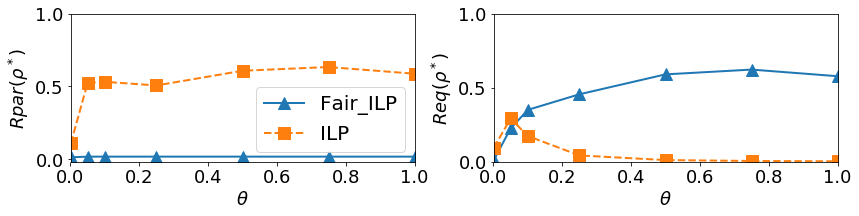

In [10]:
plt.rcParams["figure.figsize"] = (12,3)
plt.rcParams["font.size"] = 18
plt.rcParams['legend.fontsize'] = 20
# titles = [r"fair $p = 0.5$",r"somewhat biased $p = 0.7$",r"strongly biased $p = 0.9$"]
titles = [r"$p = 0.5$",r"$p = 0.7$",r"$p = 0.9$"]
# for thresh in [12,122,306]:
for thresh in [12]:
#     print("thresh:"+str(thresh))
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
    fig.tight_layout(pad=1.0)
    print(len(axes))
    log4 = log[log['p']==0.7]
    log5 = log4[log4['method'] != 'ILP_eq'][['theta','method','thresh','time','equality','parity']]
    log5 = log5[log5['thresh']==thresh]
    log5 = log5.groupby(by = ['theta','method']).mean()
    axes[0] = log5['parity'].unstack().plot(ax=axes[0],style=['^-', 's--', 'o--', '*-'], ms=12, linewidth=2.0)
    axes[0].set_yticks([0, 0.5, 1])
    axes[0].set_ylabel(r"$Rpar(\rho^*)$")
    axes[0].set_xlabel(r"$\theta$")
#         axes.set_xlabel("")
    axes[0].get_legend().set_title("")
    axes[1] = log5['equality'].unstack().plot(ax=axes[1],style=['^-', 's--', 'o--', '*-'], ms=12, linewidth=2.0)
#     axes[1].set_title(titles)
    axes[1].set_ylabel(r"$Req(\rho^*)$")
    axes[1].set_xlabel(r"$\theta$")
    axes[1].set_ylim(0,1)
    axes[1].set_yticks([0, 0.5, 1])
    axes[1].get_legend().set_title("")
    axes[1].get_legend().remove()
#         plt.savefig("figures/parityh.pdf",bbox_inches='tight')
#         plt.show()
#     plt.setp(axs[len(thetas)][j].get_xticklabels(), fontsize=18)
#     plt.savefig("figures/kendall_parity.pdf", bbox_inches='tight')
plt.savefig("equality.pdf",bbox_inches='tight')

3


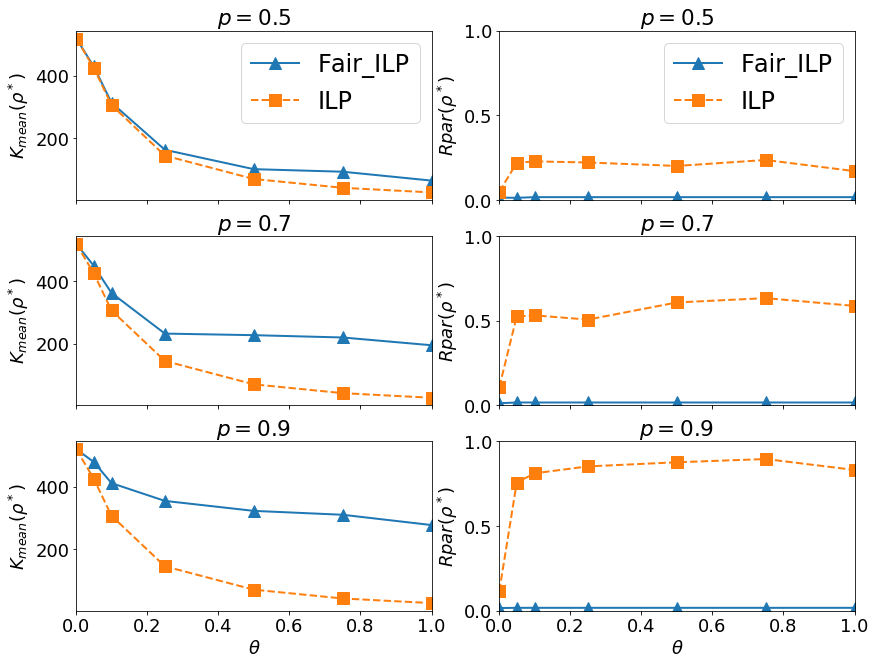

In [11]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 18
plt.rcParams['legend.fontsize'] = 24
# titles = [r"fair $p = 0.5$",r"somewhat biased $p = 0.7$",r"strongly biased $p = 0.9$"]
titles = [r"$p = 0.5$",r"$p = 0.7$",r"$p = 0.9$"]
# for thresh in [12,122,306]:
for thresh in [12]:
#     print("thresh:"+str(thresh))
    fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True)
    fig.tight_layout(pad=1.0)
    print(len(axes))
    for i,p in enumerate([0.5,0.7,0.9]):
        log4 = log[log['p']==p]
        log5 = log4[log4['method'] != 'ILP_eq'][['theta','method','thresh','time','kendall','parity']]
        log5 = log5[log5['thresh']==thresh]
        log5 = log5.groupby(by = ['theta','method']).mean()
        axes[i][0] = log5['kendall'].unstack().plot(ax=axes[i][0],style=['^-', 's--', 'o--', '*-'], ms=12, linewidth=2.0)
        axes[i][0].set_title(titles[i])
        axes[i][0].set_ylabel(r"$K_{mean}(\rho^*)$")
        axes[i][0].set_xlabel(r"$\theta$")
#         axes[i].set_xlabel("")
        axes[i][0].get_legend().set_title("")
#         thetas = log5.index.get_level_values(0).drop_duplicates()
        if i != 0:
            axes[i][0].get_legend().remove()
    for i,p in enumerate([0.5,0.7,0.9]):
        log4 = log[log['p']==p]
        log5 = log4[log4['method'] != 'ILP_eq'][['theta','method','thresh','time','kendall','parity']]
        log5 = log5[log5['thresh']==thresh]
        log5 = log5.groupby(by = ['theta','method']).mean()
        axes[i][1] = log5['parity'].unstack().plot(ax=axes[i][1],style=['^-', 's--', 'o--', '*-'], ms=12, linewidth=2.0)
        axes[i][1].set_title(titles[i])
        axes[i][1].set_ylabel(r"$Rpar(\rho^*)$")
        axes[i][1].set_xlabel(r"$\theta$")
#         axes[i].set_xlabel("")
        axes[i][1].set_ylim(0,1)
        axes[i][1].set_yticks([0, 0.5, 1])
        axes[i][1].get_legend().set_title("")
#         thetas = log5.index.get_level_values(0).drop_duplicates()
        if i != 0:
            axes[i][1].get_legend().remove()
#         plt.savefig("figures/parityh.pdf",bbox_inches='tight')
#         plt.show()
#     plt.setp(axs[len(thetas)][j].get_xticklabels(), fontsize=18)
    plt.savefig("kendall_parity.pdf", bbox_inches='tight')
